# 行人数据集

##  pixel_pos.csv文件格式

pixel_pose.csv包含4行，第一行是所有的Frame Number；第二行是所有行人的ID；第三行是所有的y坐标；第四行是所有的x坐标。

pixel_pose.csv的列数是所有行人轨迹点的数量。

In [83]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

# directory = "./data/eth/hotel"

directory = "./data/eth/univ"

file_path = os.path.join(directory, 'pixel_pos.csv')

data = np.genfromtxt(file_path, delimiter=',')

# Get the number of pedestrians in the current dataset
pedIDs = np.unique(data[1, :])
numPeds = np.size(pedIDs)

pedIndexLookup = {}

for ped_index, ped_id in enumerate(pedIDs):
    pedIndexLookup[ped_id] = ped_index

frameIDs = np.unique(data[0, :])
numFrames = np.size(frameIDs)

print("number of pedestrians is: {}, number of frames is {}".format(numPeds, numFrames))

all_frame_data = {}

for frameID in frameIDs:
    
    traj = data[:, data[0, :] == frameID]
    
    all_frame_data[frameID] = traj


fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(0, 1))
line, = ax.plot([], [], lw=2)
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
 
plotnums = numPeds
plotcols = [np.random.rand(3,) for _ in range(plotnums)]

lines = []

for index in range(plotnums):
    lobj = ax.plot([],[],lw=2,color=plotcols[index], marker='o', markerfacecolor=plotcols[index],markersize = 10)[0]
    lines.append(lobj)
 
def init():
    for line in lines:
        line.set_data([],[])
        
    time_text.set_text('')
    
    return line, time_text

def animate(i):
    frame_cnt = 0
    frame_index = i

    ped_with_pos_x = {}
    ped_with_pos_y = {}
    while frame_cnt < 1:
        frame_index += frame_cnt
        if frame_index >= numFrames:
            break

        frame_id = frameIDs[frame_index]

        frame_data = all_frame_data[frame_id]

        for ped_index in range(len(frame_data[1])):
            ped = frame_data[1][ped_index]
            if not ped in ped_with_pos_x.keys():
                ped_with_pos_x[ped] = []
                ped_with_pos_y[ped] = []

            ped_with_pos_x[ped].append(frame_data[3][ped_index])
            ped_with_pos_y[ped].append(frame_data[2][ped_index])

        frame_cnt += 1

    for ped_id, positions in ped_with_pos_x.items():
        ped_draw_index = pedIndexLookup[ped_id]

        
        if ped_draw_index < len(lines):
            lines[ped_draw_index].set_data(list(ped_with_pos_x[ped_id]), 
                                          list(ped_with_pos_y[ped_id]))
    
    time_text.set_text("current frame:{}, total frame:{}".format(frame_index ,numFrames))

    return line, time_text
 
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=1000, blit=True)
 

HTML(anim.to_html5_video())


number of pedestrians is: 360, number of frames is 1448


In [77]:
def build_model(args):
    output_size = 5
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(args.embedding_size, activation = tf.keras.activations.relu,
            batch_input_shape = [args.batch_size, None, 2]),
        tf.keras.layers.GRU(args.rnn_size,
                            return_sequences=True,
                            stateful=True,
                            recurrent_initializer='glorot_uniform'),
        tf.keras.layers.Dense(output_size)
    ])

    return model

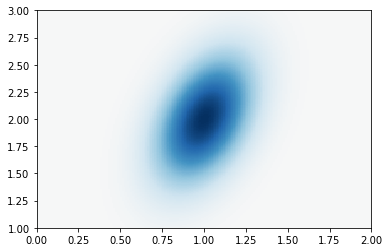

In [82]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kde
from scipy.stats import multivariate_normal

def draw_heatmap(mux, muy, sx, sy, rho, bound = 1.0):
    x, y = np.meshgrid(np.linspace(mux - bound, mux + bound, 200),
                       np.linspace(muy - bound, muy + bound, 200))
    
    mean = [mux, muy]

    # Extract covariance matrix
    cov = [[sx * sx, rho * sx * sy], [rho * sx * sy, sy * sy]]
    
    gaussian = multivariate_normal(mean = mean, cov = cov)
    d = np.dstack([x, y])
    z = gaussian.pdf(d)

    z_min, z_max = -np.abs(z).max(), np.abs(z).max()

    fig,ax = plt.subplots()

    ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
    # ax.set_title('pcolormesh')
    
    # ax.axis([x.min(), x.max(), y.min(), y.max()])
    #fig.colorbar(c, ax=ax)

    plt.show()
    
draw_heatmap(1.0, 2.0, 0.2, 0.4, 0.4)